# ЛР №1

Телешоу и фильмы, перечисленные на Netflix

Этот набор данных состоит из телешоу и фильмов, доступных на Netflix по состоянию на 2019 год. Набор данных собирается из Flixable, сторонней поисковой системы Netflix.

В 2018 году они выпустили интересный отчет, который показывает, что количество телешоу на Netflix почти утроилось с 2010 года. С 2010 года количество фильмов на потоковом сервисе уменьшилось более чем на 2000 наименований, а количество телешоу почти утроилось. Будет интересно изучить, какие другие идеи можно получить из того же набора данных.

Интеграция этого набора данных с другими внешними наборами данных, такими как рейтинги IMDB, тухлые помидоры, также может дать много интересных результатов.

Вдохновение

Некоторые из интересных вопросов (задач), которые можно выполнить с этим набором данных -

Понимание, какой контент доступен в разных странах
Выявление похожего контента путем сопоставления текстовых функций
Сетевой анализ актеров / режиссеров и поиск интересных идей
В последние годы Netflix все больше фокусируется на телевидении, а не на фильмах.

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

### Загрузка данных

In [2]:
happy_data = pd.read_csv('netflix_titles.csv', sep = ',' )

## 2)Основные характеристики датасета

In [3]:
# Первые пять строк датасета
happy_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Размер датасета
happy_data.shape

(7787, 12)

In [5]:
# Количество нулевых элементов
happy_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
 # Колонки и их типы данных
happy_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
# Описание датасета
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# Статистические данные
happy_data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [9]:
# Удаляем столбец title
happy_data = happy_data.drop('title', axis = 1)

In [10]:
# Первые пять строк датасета
happy_data.head()

,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
# Определим уникальные значения для целевого признака
happy_data['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

## 3) Визуальное исследование датасета

array([[<AxesSubplot:title={'center':'release_year'}>]], dtype=object)

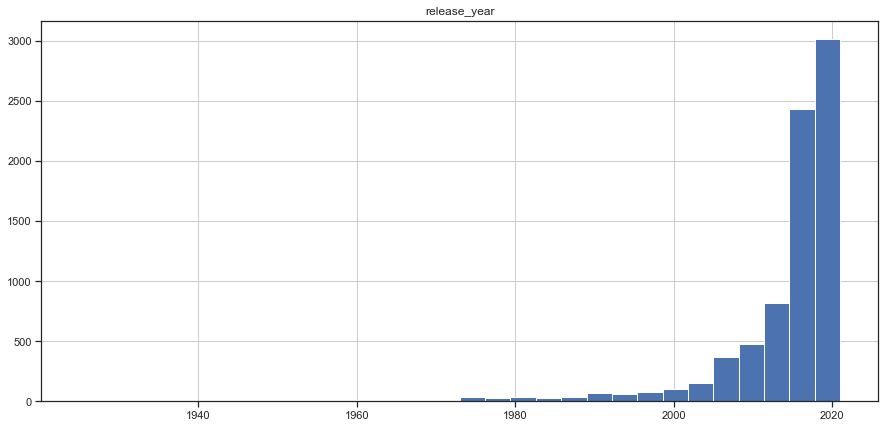

In [12]:
# Гистограммы для всех признаков
happy_data.hist(bins=30, figsize = (15,7))

<Figure size 864x432 with 0 Axes>

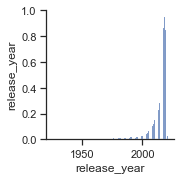

In [13]:
# Диаграммы рассеяние для всех признаков
plt.figure(figsize=(12,6))
sns.pairplot(happy_data)

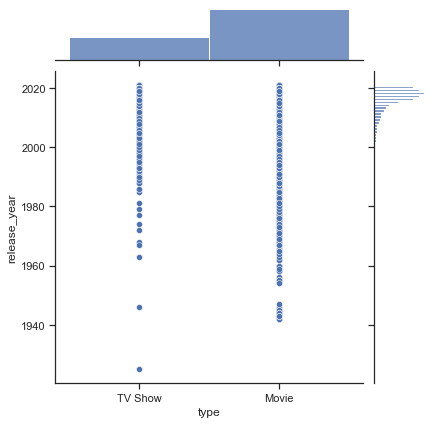

In [14]:
# Увеличенные диаграммы рассеяния для признаков, которые имеют зависимость с уровнем счастья
sns.jointplot(x = "type", y = "release_year", kind="scatter", data = happy_data)

<AxesSubplot:xlabel='release_year'>

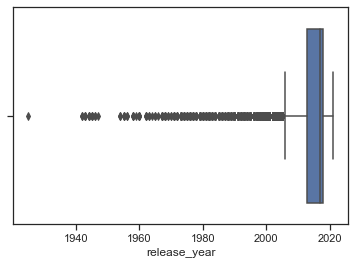

In [15]:
# Одномерное распределение вероятности
sns.boxplot(x=happy_data['release_year'])

<AxesSubplot:xlabel='release_year'>

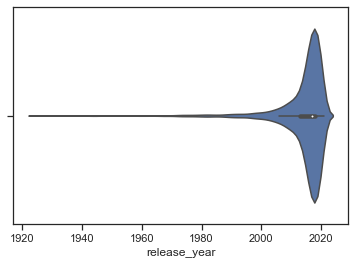

In [16]:
sns.violinplot(x=happy_data['release_year'])

## 4) Корреляции признаков

In [17]:
corr_matrix = happy_data.corr()

In [18]:
corr_matrix['release_year']

release_year    1.0
Name: release_year, dtype: float64

<AxesSubplot:>

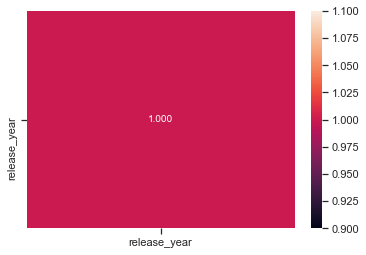

In [19]:
sns.heatmap(happy_data.corr(), annot=True, fmt='.3f')